# Proyecto 1 — CNN (CIFAR-10)

In [1]:
import sys
sys.path.append('../src')

from data import CIFAR10Data
from models import create_cnn_model, compile_model
from train import CIFAR10Trainer
from utils import print_welcome_message, print_completion_message, create_results_directory, save_training_results, save_summary_csv

print_welcome_message()
create_results_directory()

PROYECTO CIFAR-10 - CLASIFICACIÓN CON CNN
Silvia Sandoval - Portfolio Machine Learning



1.Cargando datos...
Cargando dataset CIFAR-10...
Datos cargados:
X_train: (50000, 32, 32, 3)
X_test: (10000, 32, 32, 3)
Clases: ['avión', 'auto', 'pájaro', 'gato', 'ciervo', 'perro', 'rana', 'caballo', 'barco', 'camión']

2.Creando modelo...


c:\Program Files\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 158,634 (619.66 KB)

 Trainable params: 157,930 (616.91 KB)

 Non-trainable params: 704 (2.75 KB)


3.Entrenando modelo...
Epoch 1/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - accuracy: 0.2479 - loss: 2.3586
Epoch 1: val_accuracy improved from None to 0.42580, saving model to ../results/cifar10_cnn_best.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 220s 261ms/step - accuracy: 0.3205 - loss: 1.9647 - val_accuracy: 0.4258 - val_loss: 1.5770 - learning_rate: 0.0010
Epoch 2/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.4571 - loss: 1.4846
Epoch 2: val_accuracy improved from 0.42580 to 0.53730, saving model to ../results/cifar10_cnn_best.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 131s 167ms/step - accuracy: 0.4832 - loss: 1.4233 - val_accuracy: 0.5373 - val_loss: 1.2889 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 2.

4.Evaluando modelo...


Precisión en test: 0.5373
Pérdida en test: 1.2889
Modelo guardado en: ../results/cifar10_cnn_model.h5


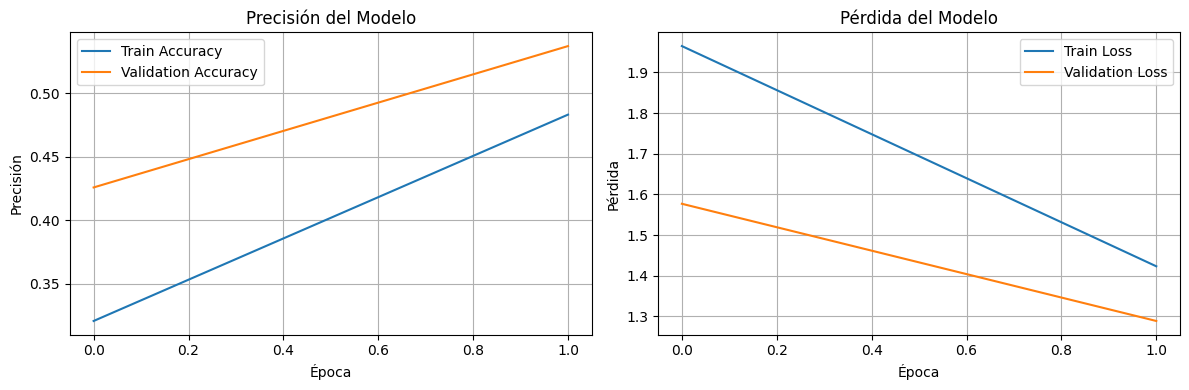

Resultados guardados en: ../results/training_results.json
Métricas añadidas a ../results/summary.csv
Modelo entrenado y evaluado correctamente


In [2]:
# 1. Cargar datos
print("\n1.Cargando datos...")
data_loader = CIFAR10Data()
x_train, y_train, x_test, y_test = data_loader.load_data()
class_names = data_loader.get_class_names()

# 2. Crear modelo
print("\n2.Creando modelo...")
model = create_cnn_model()
model = compile_model(model)

# 3. Entrenar modelo
print("\n3.Entrenando modelo...")
trainer = CIFAR10Trainer(model, "cifar10_cnn")
history = trainer.train_model(x_train, y_train, x_test, y_test, epochs=2)


# 4. Evaluar y guardar
print("\n4.Evaluando modelo...")
test_loss, test_accuracy = trainer.evaluate_model(x_test, y_test)
trainer.save_model()
trainer.plot_training_history()


model_name = "cifar10_cnn"
results = save_training_results(history, test_accuracy, model_name)  
save_summary_csv(results)



print_completion_message()